In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
import rhinoMorph
from konlpy.tag import Okt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics.pairwise import linear_kernel
from collections import Counter
from sklearn.cluster import KMeans

In [2]:
#불용어 import
stopwords2 = pd.read_csv('./불용어리스트2.txt',header=None)
stopwords = list(stopwords2[0])
stopwords

['아',
 '휴',
 '아이구',
 '아이쿠',
 '아이고',
 '어',
 '나',
 '우리',
 '저희',
 '따라',
 '의해',
 '을',
 '를',
 '에',
 '의',
 '가',
 '으로',
 '로',
 '에게',
 '뿐이다',
 '의거하여',
 '근거하여',
 '입각하여',
 '기준으로',
 '예하면',
 '예를 들면',
 '예를 들자면',
 '저',
 '소인',
 '소생',
 '저희',
 '지말고',
 '하지마',
 '하지마라',
 '다른',
 '물론',
 '또한',
 '그리고',
 '비길수 없다',
 '해서는 안된다',
 '뿐만 아니라',
 '만이 아니다',
 '만은 아니다',
 '막론하고',
 '관계없이',
 '그치지 않다',
 '그러나',
 '그런데',
 '하지만',
 '든간에',
 '논하지 않다',
 '따지지 않다',
 '설사',
 '비록',
 '더라도',
 '아니면',
 '만 못하다',
 '하는 편이 낫다',
 '불문하고',
 '향하여',
 '향해서',
 '향하다',
 '쪽으로',
 '틈타',
 '이용하여',
 '타다',
 '오르다',
 '제외하고',
 '이 외에',
 '이 밖에',
 '하여야',
 '비로소',
 '한다면 몰라도',
 '외에도',
 '이곳',
 '여기',
 '부터',
 '기점으로',
 '따라서',
 '할 생각이다',
 '하려고하다',
 '이리하여',
 '그리하여',
 '그렇게 함으로써',
 '하지만',
 '일때',
 '할때',
 '앞에서',
 '중에서',
 '보는데서',
 '으로써',
 '로써',
 '까지',
 '해야한다',
 '일것이다',
 '반드시',
 '할줄알다',
 '할수있다',
 '할수있어',
 '임에 틀림없다',
 '한다면',
 '등',
 '등등',
 '제',
 '겨우',
 '단지',
 '다만',
 '할뿐',
 '딩동',
 '댕그',
 '대해서',
 '대하여',
 '대하면',
 '훨씬',
 '얼마나',
 '얼마만큼',
 '얼마큼',
 '남짓',
 '여',
 '얼마간',
 '약간',
 '다소',
 '좀',
 '조

In [3]:
peter_df = pd.read_csv('./articles_final_peter.csv')

In [4]:
jm_df = pd.read_csv('./extData_LDA_ver1.csv')
jm_df

,media,date,title,article_original,url
0,조선일보,2020-01-17,방탄소년단 신보 수록곡 선공개 전 세계 아미 시선 집중,방탄소년단BTS이 정규 앨범 발매에 앞서 수록곡 중 하나를 먼저 선보인다. 지난해 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
1,조선일보,2020-02-22,BTS 새 앨범 전세계 91개 지역 아이튠즈 차트 석권,그룹 방탄소년단BTS의 새 앨범이 발매와 동시에 전 세계 91개 지역에서 아이튠즈 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
2,조선일보,2020-03-16,방탄소년단 빌보드 200 8위3주 연속 10위권,그룹 방탄소년단BTS이 미국 빌보드 메인 앨범 차트인 빌보드 200에서 8위를 차지...,https://news.naver.com/main/read.nhn?mode=LSD&...
3,경향신문,2020-06-08,방탄소년단의 온라인 축사 우리도 서툰 20대우리가 위로와 희망이 되고 싶다,경향신문그룹 방탄소년단BTS이 코로나19 확산으로 오프라인 졸업식에 가지 못하는 졸...,https://news.naver.com/main/read.nhn?mode=LSD&...
4,경향신문,2020-09-15,방탄소년단 미국 빌보드 싱글 차트 2위3주째 최상위권,경향신문 그룹 방탄소년단BTS의 다이너마이트Dynamite가 미국 빌보드 메인 싱글...,https://news.naver.com/main/read.nhn?mode=LSD&...
5,조선일보,2020-09-17,방탄소년단 빅히트 공모주 다이너마이트 터지나,내달56일 코스피 일반 청약 신주 713만주 중 142만주 배정청약증거금 58조원을...,https://news.naver.com/main/read.nhn?mode=LSD&...
6,경향신문,2020-09-24,BTS 필사적으로 자신을 사랑하고 미래를 상상하려 노력하세요,경향신문 2년 만에 유엔 화상 총회 참여 코로나 위기 속 연대의 목소리지금이야말로 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
7,경향신문,2020-10-06,방탄소년단 다이너마이트 6주째 빌보드 싱글 1위 아니면 2위,경향신문그룹 방탄소년단BTS의 다이너마이트가 미국 빌보드 메인 싱글 차트 핫 100...,https://news.naver.com/main/read.nhn?mode=LSD&...
8,중앙일보,2020-10-07,정치권 BTS 병역 특례를 아미 본인들 군대 간다는데 왜,BTS는 빌보드 1위로 1조7000억원의 경제 파급 효과를 냈고 한류 전파와 국위 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
9,중앙일보,2020-10-11,ARXR 첨단기술 총동원1억건 응원 쏟아진 BTS 온라인 콘서트,14만명 75만명 다음은지난해 6월 네이버 브이라이브를 통해 영국 웸블리 공연 생중...,https://news.naver.com/main/read.nhn?mode=LSD&...


In [5]:
will_df = pd.read_csv('./Willver2_rhino10.csv')
will_df

,media,date,title,article_original,url
0,조선일보,2020-01-29,7명의 몸짓을 예술로 현대미술이 BTS라는 물길을 만났다,커넥트 BTS서울 BTS 철학 담은 현대미술 작품 세계 5개도시서 펼치는 프로젝트2...,https://news.naver.com/main/read.nhn?mode=LSD&...
1,한겨레,2020-03-02,BTS 4연속 빌보드 정상비틀스 이래 최단기간 달성 그룹,그룹 방탄소년단BTS의 새 앨범 맵 오브 더 솔7MAP OF THE SOUL7이 영...,https://news.naver.com/main/read.nhn?mode=LSD&...
2,한겨레,2020-06-04,BTS 인종차별과 폭력에 반대우리 모두 존중받을 권리 있어,그룹 방탄소년단BTS이 인종차별과 폭력에 반대한다는 뜻을 밝혔다. 미국에서 백인 경...,https://news.naver.com/main/read.nhn?mode=LSD&...
3,조선일보,2020-09-01,방탄소년단 한국 가수 최초 빌보드 싱글 1위K팝 새역사,2012년 싸이 강남스타일 2위 기록 넘어서방탄소년단BTS이 한국 가수 중 처음으로...,https://news.naver.com/main/read.nhn?mode=LSD&...
4,경향신문,2020-09-03,빅히트 공모주 청약 앞두고 BTS에 주식 증여상장 시 1인당 최대 200억원대,경향신문방탄소년단BTS이 소속사인 빅히트엔터테인먼트로부터 1인당 7만주 가까운 보통...,https://news.naver.com/main/read.nhn?mode=LSD&...
5,조선일보,2020-09-20,다이너마이트 영어로 부른 BTS 방탄 노래는 들려 따라갈 수 있겠다 영상,동영상 뉴스문재인 대통령이 방탄소년단BTS의 노래에 대해 그들의 노래와 춤 모두를 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
6,중앙일보,2020-10-07,아미도 냅두라는데BTS 병역특례 2년만에 다시 띄우는,BTS를 병역특례 해주자는 입장이 아니다. 순수예술인은 특례대상인데 대중예술인은 아...,https://news.naver.com/main/read.nhn?mode=LSD&...
7,중앙일보,2020-10-14,14억 시장에 휘둘린 BTS로이터 중국은 정치적 지뢰,중국 관영 매체 환구시보가 방탄소년단BTS의 수상 소감이 중국 네티즌의 분노를 일으...,https://news.naver.com/main/read.nhn?mode=LSD&...
8,중앙일보,2020-10-20,택배사 또 BTS제품 거부우리가 했겠나 이유 알지 않나,중국 내 5위 규모의 물류업체 윈다가 방탄소년단BTS 관련 제품 배송을 중단하겠다고...,https://news.naver.com/main/read.nhn?mode=LSD&...
9,경향신문,2020-12-01,한글 노래가 빌보드 싱글차트 1위에 방탄소년단 세계 팝시장의 상수가 되다,경향신문방탄소년단BTS이 한국어 곡으로 미국 빌보드 싱글 차트 정상에 올랐다. 빌보...,https://news.naver.com/main/read.nhn?mode=LSD&...


In [6]:
articles_df = pd.concat([peter_df,jm_df,will_df])
articles_df.sort_values(by='date',inplace=True)

In [7]:
articles_df.reset_index(inplace=True)
articles_df.drop('index',inplace=True,axis=1)
articles_df

,media,date,title,article_original,url
0,조선일보,2020-01-17,방탄소년단 신보 수록곡 선공개 전 세계 아미 시선 집중,방탄소년단BTS이 정규 앨범 발매에 앞서 수록곡 중 하나를 먼저 선보인다. 지난해 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
1,조선일보,2020-01-27,방탄소년단 한국 가수 최초 그래미 공연 내년엔 후보 도전,그룹 방탄소년단 BTS 이 26일 현지 시각 한국 가수 최초로 미국 그래미 시싱식에...,https://news.naver.com/main/read.nhn?mode=LSD&...
2,조선일보,2020-01-29,7명의 몸짓을 예술로 현대미술이 BTS라는 물길을 만났다,커넥트 BTS서울 BTS 철학 담은 현대미술 작품 세계 5개도시서 펼치는 프로젝트2...,https://news.naver.com/main/read.nhn?mode=LSD&...
3,조선일보,2020-02-22,BTS 새 앨범 전세계 91개 지역 아이튠즈 차트 석권,그룹 방탄소년단BTS의 새 앨범이 발매와 동시에 전 세계 91개 지역에서 아이튠즈 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
4,경향신문,2020-02-28,BTS 월드투어 4월 서울 콘서트 취소 코로나19 확산 비상,일부 팬들 환불받아 성금 기탁 트와이스 등 공연 취소 잇따라 코로나19의 확산으...,https://news.naver.com/main/read.nhn?mode=LSD&...
5,한겨레,2020-03-02,BTS 4연속 빌보드 정상비틀스 이래 최단기간 달성 그룹,그룹 방탄소년단BTS의 새 앨범 맵 오브 더 솔7MAP OF THE SOUL7이 영...,https://news.naver.com/main/read.nhn?mode=LSD&...
6,조선일보,2020-03-16,방탄소년단 빌보드 200 8위3주 연속 10위권,그룹 방탄소년단BTS이 미국 빌보드 메인 앨범 차트인 빌보드 200에서 8위를 차지...,https://news.naver.com/main/read.nhn?mode=LSD&...
7,조선일보,2020-03-16,방탄소년단 빌보드 200 8위3주 연속 10위권,그룹 방탄소년단 BTS 이 미국 빌보드 메인 앨범 차트인 빌보드 200에서 8위를 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
8,조선일보,2020-04-10,신승훈김건모 위에 BTS 2032만장으로 역대 최다 앨범 판매량 기록,그룹 방탄소년단 BTS 사진 이 한국 가요 역사상 음반을 가장 많이 판 가수가 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
9,조선일보,2020-05-18,이태원 아이돌 BTS 정국 아스트로 차은우 NCT 재현 세븐틴 민규였다,최근 소문으로만 떠돌던 이태원발 코로나 집단 감염 기간 이태원 방문 아이돌이 그룹 ...,https://news.naver.com/main/read.nhn?mode=LSD&...


In [8]:
rhino = rhinoMorph.startRhino()
articles_df['tokenized_sents'] = articles_df.article_original.apply(lambda x: rhinoMorph.onlyMorph_list(rhino, x, pos=['NNG','NNP','VA'], combineN=True)) # eomi=True, xrVv=True))
articles_df.tokenized_sents = articles_df.tokenized_sents.apply(lambda x : [w for w in x if x not in stopwords if len(w) >1])  # 불용어 제거

tokenized_df = articles_df
tokenized_df

filepath:  C:\Users\user\anaconda3\Lib\site-packages
classpath:  C:\Users\user\anaconda3\Lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!


,media,date,title,article_original,url,tokenized_sents
0,조선일보,2020-01-17,방탄소년단 신보 수록곡 선공개 전 세계 아미 시선 집중,방탄소년단BTS이 정규 앨범 발매에 앞서 수록곡 중 하나를 먼저 선보인다. 지난해 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[방탄, 정규, 앨범, 발매, 수록곡, 지난해, 세계, 뜨겁, 히트곡, 열풍, 소속..."
1,조선일보,2020-01-27,방탄소년단 한국 가수 최초 그래미 공연 내년엔 후보 도전,그룹 방탄소년단 BTS 이 26일 현지 시각 한국 가수 최초로 미국 그래미 시싱식에...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[그룹, 방탄소년단, 현지, 시각, 한국, 가수, 최초, 미국, 방탄소년단, 이날,..."
2,조선일보,2020-01-29,7명의 몸짓을 예술로 현대미술이 BTS라는 물길을 만났다,커넥트 BTS서울 BTS 철학 담은 현대미술 작품 세계 5개도시서 펼치는 프로젝트2...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[서울, 철학, 현대미술, 작품, 세계, 도시, 프로젝트, 서울, 개막, 강이, 참..."
3,조선일보,2020-02-22,BTS 새 앨범 전세계 91개 지역 아이튠즈 차트 석권,그룹 방탄소년단BTS의 새 앨범이 발매와 동시에 전 세계 91개 지역에서 아이튠즈 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[그룹, 방탄, 앨범, 발매, 동시, 세계, 지역, 아이, 차트, 소속사, 빅히트엔..."
4,경향신문,2020-02-28,BTS 월드투어 4월 서울 콘서트 취소 코로나19 확산 비상,일부 팬들 환불받아 성금 기탁 트와이스 등 공연 취소 잇따라 코로나19의 확산으...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[일부, 환불, 성금, 기탁, 트와이스, 공연, 취소, 코로나, 확산, 그룹, 방탄..."
5,한겨레,2020-03-02,BTS 4연속 빌보드 정상비틀스 이래 최단기간 달성 그룹,그룹 방탄소년단BTS의 새 앨범 맵 오브 더 솔7MAP OF THE SOUL7이 영...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[그룹, 방탄, 앨범, 오브, 영국, 오피셜, 차트, 빌보드, 차트, 한국, 가수,..."
6,조선일보,2020-03-16,방탄소년단 빌보드 200 8위3주 연속 10위권,그룹 방탄소년단BTS이 미국 빌보드 메인 앨범 차트인 빌보드 200에서 8위를 차지...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[그룹, 방탄, 미국, 빌보드, 메인, 앨범, 차트, 빌보드, 연속, 빌보드, 예고..."
7,조선일보,2020-03-16,방탄소년단 빌보드 200 8위3주 연속 10위권,그룹 방탄소년단 BTS 이 미국 빌보드 메인 앨범 차트인 빌보드 200에서 8위를 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[그룹, 방탄소년단, 미국, 빌보드, 메인, 앨범, 차트, 빌보드, 연속, 빌보드,..."
8,조선일보,2020-04-10,신승훈김건모 위에 BTS 2032만장으로 역대 최다 앨범 판매량 기록,그룹 방탄소년단 BTS 사진 이 한국 가요 역사상 음반을 가장 많이 판 가수가 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[그룹, 방탄소년단, 사진, 한국, 역사상, 음반, 가수, 소속사, 빅히트엔터테인먼..."
9,조선일보,2020-05-18,이태원 아이돌 BTS 정국 아스트로 차은우 NCT 재현 세븐틴 민규였다,최근 소문으로만 떠돌던 이태원발 코로나 집단 감염 기간 이태원 방문 아이돌이 그룹 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[최근, 소문, 이태원, 코로나, 집단, 감염, 기간, 이태원, 방문, 아이돌, 그..."


In [12]:
tfidf_vect = TfidfVectorizer(max_df=2000, lowercase=False, min_df=10, stop_words=stopwords)

C:\Users\user\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['가서', '같은', '것과', '결과에', '결론을', '관계가', '관련이', '그런', '그럼에도', '그렇게', '그에', '그치지', '김에', '까닭에', '낫다', '년도', '논하지', '누가', '다시', '달려', '대로', '대해', '되는', '되다', '되어', '들면', '들자면', '듯하다', '따르는', '따름이다', '따지지', '때가', '만은', '만이', '만큼', '많은', '말하면', '말할것도', '몰라도', '몰랏다', '못하다', '미치다', '바꾸어서', '바꿔', '밖에', '방면으로', '보면', '보아', '부류의', '비길수', '비추어', '뿐만', '사람들', '상대적으로', '생각이다', '서술한바와같이', '쓰여', '아니다', '아니라', '안다', '안된다', '않고', '않기', '않는다면', '않다', '않다면', '않도록', '않으면', '알겠는가', '어쩔수', '어찌됏든', '없고', '없다', '예를', '외에', '요만한', '우에', '위에서', '이렇게', '이로', '이르다', '이와', '이유는', '인하여', '임에', '점에서', '정도에', '정도의', '종합한것과같이', '주저하지', '줄은', '지경이다', '틀림없다', '편이', '하고', '하기', '하기만', '하는', '하는것만', '하는것이', '하다', '하면', '하지', '한하다', '할수록', '함으로써', '해도', '해서는', '형식으로', '힘이'] not in stop_words.
  warnings.warn('Your stop_words ma

CounterVectorizer Shape(Original): (36, 41)
(36, 36)
[[1.         0.45258916 0.0518565  ... 0.43320227 0.49022423 0.49022423]
 [0.45258916 1.         0.18103648 ... 0.4553656  0.45765558 0.45765558]
 [0.0518565  0.18103648 1.         ... 0.08304356 0.01202268 0.01202268]
 ...
 [0.43320227 0.4553656  0.08304356 ... 1.         0.93596196 0.93596196]
 [0.49022423 0.45765558 0.01202268 ... 0.93596196 1.         1.        ]
 [0.49022423 0.45765558 0.01202268 ... 0.93596196 1.         1.        ]]


<AxesSubplot:>

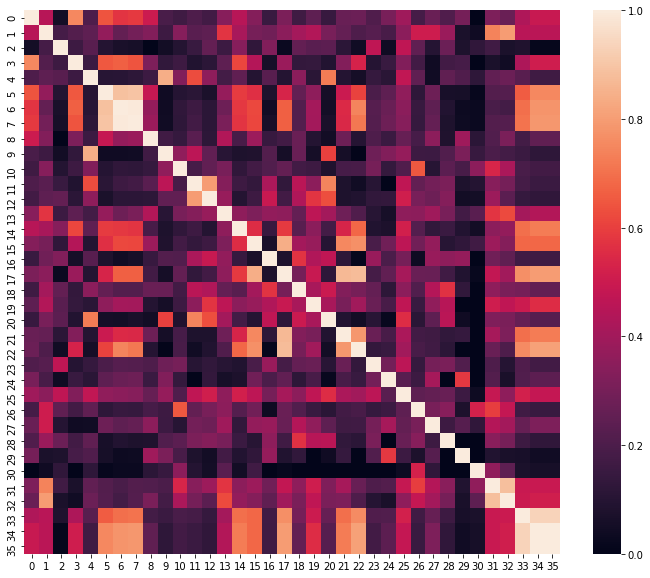

In [13]:
bow_cnt = tfidf_vect.fit_transform(tokenized_df.tokenized_sents.astype(str))
print('CounterVectorizer Shape(Original):', bow_cnt.shape)

# cosine similarity 
cos_sim = cosine_similarity(bow_cnt,bow_cnt)
print(cos_sim.shape)
print(cos_sim)
plt.figure(figsize=(12,10))
sns.heatmap(cos_sim)

In [15]:
km_cluster = KMeans(n_clusters=10)#, max_iter=10000)
km_cluster.fit(bow_cnt)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [16]:
tokenized_df['cluster_label'] = cluster_label

,media,date,title,article_original,url,tokenized_sents,cluster_label
0,조선일보,2020-01-17,방탄소년단 신보 수록곡 선공개 전 세계 아미 시선 집중,방탄소년단BTS이 정규 앨범 발매에 앞서 수록곡 중 하나를 먼저 선보인다. 지난해 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[방탄, 정규, 앨범, 발매, 수록곡, 지난해, 세계, 뜨겁, 히트곡, 열풍, 소속...",1
1,조선일보,2020-01-27,방탄소년단 한국 가수 최초 그래미 공연 내년엔 후보 도전,그룹 방탄소년단 BTS 이 26일 현지 시각 한국 가수 최초로 미국 그래미 시싱식에...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[그룹, 방탄소년단, 현지, 시각, 한국, 가수, 최초, 미국, 방탄소년단, 이날,...",7
2,조선일보,2020-01-29,7명의 몸짓을 예술로 현대미술이 BTS라는 물길을 만났다,커넥트 BTS서울 BTS 철학 담은 현대미술 작품 세계 5개도시서 펼치는 프로젝트2...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[서울, 철학, 현대미술, 작품, 세계, 도시, 프로젝트, 서울, 개막, 강이, 참...",3
3,조선일보,2020-02-22,BTS 새 앨범 전세계 91개 지역 아이튠즈 차트 석권,그룹 방탄소년단BTS의 새 앨범이 발매와 동시에 전 세계 91개 지역에서 아이튠즈 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[그룹, 방탄, 앨범, 발매, 동시, 세계, 지역, 아이, 차트, 소속사, 빅히트엔...",1
4,경향신문,2020-02-28,BTS 월드투어 4월 서울 콘서트 취소 코로나19 확산 비상,일부 팬들 환불받아 성금 기탁 트와이스 등 공연 취소 잇따라 코로나19의 확산으...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[일부, 환불, 성금, 기탁, 트와이스, 공연, 취소, 코로나, 확산, 그룹, 방탄...",5


In [43]:
tokenized_df = (tokenized_df.groupby('cluster_label').filter(lambda x: len (x) > 1)).copy()

In [44]:
tokenized_df

,media,date,title,article_original,url,tokenized_sents,cluster_label
0,조선일보,2020-01-17,방탄소년단 신보 수록곡 선공개 전 세계 아미 시선 집중,방탄소년단BTS이 정규 앨범 발매에 앞서 수록곡 중 하나를 먼저 선보인다. 지난해 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[방탄, 정규, 앨범, 발매, 수록곡, 지난해, 세계, 뜨겁, 히트곡, 열풍, 소속...",1
1,조선일보,2020-01-27,방탄소년단 한국 가수 최초 그래미 공연 내년엔 후보 도전,그룹 방탄소년단 BTS 이 26일 현지 시각 한국 가수 최초로 미국 그래미 시싱식에...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[그룹, 방탄소년단, 현지, 시각, 한국, 가수, 최초, 미국, 방탄소년단, 이날,...",7
2,조선일보,2020-01-29,7명의 몸짓을 예술로 현대미술이 BTS라는 물길을 만났다,커넥트 BTS서울 BTS 철학 담은 현대미술 작품 세계 5개도시서 펼치는 프로젝트2...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[서울, 철학, 현대미술, 작품, 세계, 도시, 프로젝트, 서울, 개막, 강이, 참...",3
3,조선일보,2020-02-22,BTS 새 앨범 전세계 91개 지역 아이튠즈 차트 석권,그룹 방탄소년단BTS의 새 앨범이 발매와 동시에 전 세계 91개 지역에서 아이튠즈 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[그룹, 방탄, 앨범, 발매, 동시, 세계, 지역, 아이, 차트, 소속사, 빅히트엔...",1
4,경향신문,2020-02-28,BTS 월드투어 4월 서울 콘서트 취소 코로나19 확산 비상,일부 팬들 환불받아 성금 기탁 트와이스 등 공연 취소 잇따라 코로나19의 확산으...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[일부, 환불, 성금, 기탁, 트와이스, 공연, 취소, 코로나, 확산, 그룹, 방탄...",5
5,한겨레,2020-03-02,BTS 4연속 빌보드 정상비틀스 이래 최단기간 달성 그룹,그룹 방탄소년단BTS의 새 앨범 맵 오브 더 솔7MAP OF THE SOUL7이 영...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[그룹, 방탄, 앨범, 오브, 영국, 오피셜, 차트, 빌보드, 차트, 한국, 가수,...",1
6,조선일보,2020-03-16,방탄소년단 빌보드 200 8위3주 연속 10위권,그룹 방탄소년단BTS이 미국 빌보드 메인 앨범 차트인 빌보드 200에서 8위를 차지...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[그룹, 방탄, 미국, 빌보드, 메인, 앨범, 차트, 빌보드, 연속, 빌보드, 예고...",1
7,조선일보,2020-03-16,방탄소년단 빌보드 200 8위3주 연속 10위권,그룹 방탄소년단 BTS 이 미국 빌보드 메인 앨범 차트인 빌보드 200에서 8위를 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[그룹, 방탄소년단, 미국, 빌보드, 메인, 앨범, 차트, 빌보드, 연속, 빌보드,...",1
9,조선일보,2020-05-18,이태원 아이돌 BTS 정국 아스트로 차은우 NCT 재현 세븐틴 민규였다,최근 소문으로만 떠돌던 이태원발 코로나 집단 감염 기간 이태원 방문 아이돌이 그룹 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[최근, 소문, 이태원, 코로나, 집단, 감염, 기간, 이태원, 방문, 아이돌, 그...",5
10,한겨레,2020-06-04,BTS 인종차별과 폭력에 반대우리 모두 존중받을 권리 있어,그룹 방탄소년단BTS이 인종차별과 폭력에 반대한다는 뜻을 밝혔다. 미국에서 백인 경...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[그룹, 방탄, 인종차별, 폭력, 미국, 백인, 경찰, 무릎, 흑인, 조지, 플로이...",2


In [39]:
tokenized_df.index[tokenized_df.groupby(by='cluster_label')['media'].count()]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 36 but corresponding boolean dimension is 10

In [ ]:
tokenized_df['cluster_label'].value == 1

In [45]:
tokenized_df.groupby(by='cluster_label')['media'].count()

cluster_label
1    5
2    3
3    4
4    8
5    5
6    2
7    5
9    2
Name: media, dtype: int64

In [50]:
order_list =[]
order_list.append (tokenized_df['cluster_label'].unique())